In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prototxt_path = "architecture.txt"
model_path = "res10_300x300_ssd_iter_140000_fp16.caffemodel"

model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

In [3]:
image = cv2.imread("task2/your image name ")

[ WARN:0@0.363] global loadsave.cpp:244 findDecoder imread_('image name'): can't open/read file: check file path/integrity


In [4]:
hieght, width = image.shape[:2]
kernel_width = (width // 7) | 1
kernel_height = (hieght // 7) | 1

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
imageResize = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

In [ ]:
model.setInput(imageResize)
output = np.squeeze(model.forward())


In [ ]:
for i in range(0, output.shape[0]):
    confidence = output[i, 2]
    if confidence > 0.4:
        box = output[i, 3:7] * np.array([w, h, w, h])
        start_x, start_y, end_x, end_y = box.astype(int)
        face = image[start_y: end_y, start_x: end_x]
        face = cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)
        image[start_y: end_y, start_x: end_x] = face


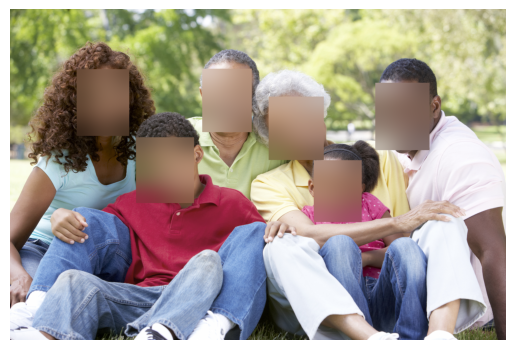

In [ ]:
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()